In [19]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [20]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))
true_df_backup = pickle.load(open("pickle_files/true_df_backup.pkl", "rb" ))

In [21]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [22]:
stemmer = porter.PorterStemmer()
stopwords = stopwords.words()

In [23]:
def clean_text(text):
    '''Removes stop words and changes word to stem words'''
    cleaned_text = []
    for post in text:
        cleaned_words = []
        for word in post.split():
            low_word = stemmer.stem(word.lower())
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
    return cleaned_text

In [12]:
cleaned_text = clean_text(true_df.body)

In [7]:
'''with open('cleaned_text.pkl', 'wb') as picklefile:
        pickle.dump(cleaned_text, picklefile)'''

In [13]:
'''clean_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'''


In [50]:
os.system('say "This job is as done as we are with Sarah Sander\'s stupid lies."')

0

In [24]:
len(cleaned_text)

4092

In [48]:
hmmm = []
for x in cleaned_text:
    yep = pos_tag(word_tokenize(x))
    hmmm.append(yep)

In [38]:
def drop_nouns(text_list):
    no_nouns = []
    cleaned_text = []
    all_nouns = ['NN' or 'NNS' or 'NNP' or 'NNPS']
    for x in text_list:
        words = pos_tag(word_tokenize(x))
        #werdz = [s for s in words if s[-1] != 'NN']# or 'NNS' or 'NNP' or 'NNPS']
        #werdz = [s for s in werdz if s[-1] != 'NNS']
        #werdz2 = ['NNPS', 'NNP', 'NN', 'NNS', 'JJ', 'JJS', 'JJR', 'VB', 'VB', 'VBD', 'VBG', 'VBN', 'VBN', 'VBP', 'VBZ']
        werdz2 = (['CC','CD','DT','EX','FW','IN','LS','MD','PDT','POS','PRP','PRP$','RP','TO','UH','WDT','WP','WP$','WRB',])
        werdz = [s for s, pos in words if pos != werdz2]
        #werdz2 = [s for s, pos in words if pos != 'NNP']
        '''werdz = [s for s in words if s[-1] != ',']
        werdz = [s for s in werdz if s[-1] != '.']
        werdz = [s for s in werdz if s[-1] != ':']
        werdz = [s for s in werdz if s[-1] != 'CD']
        werdz = [s for s in werdz if s[-1] != '(']
        werdz = [s for s in werdz if s[-1] != ')']
        werdz = [s for s in werdz if s[-2] != '@']
        werdz = [s for s in werdz if s[-2] != '[']
        werdz = [s for s in werdz if s[-2] != ']']
        werdz = [s for s in werdz if s[-2] != 'amp']
        werdz = [s for s in werdz if s[-2] != 'window']
        werdz = [s for s in werdz if s[-2] != 'open']
        werdz = [s for s in werdz if s[-2] != 'click']
        werdz = [s for s in werdz if s[-2] != 'googletag']
        werdz = [s for s in werdz if s[-2] != 'gpt']
        werdz = [s for s in werdz if s[-2] != 'linkitem']
        werdz = [s for s in werdz if s[-2] != 'googletag']
        werdz = [s for s in werdz if s[-2] != 'getelementbyid']
        werdz = [s for s in werdz if s[-2] != 'config']
        werdz = [s for s in werdz if s[-2] != 'ldadinit']
        werdz = [s for s in werdz if s[-2] != 'advertis']
        werdz = [s for s in werdz if s[-2] != 'typeof']
        werdz = [s for s in werdz if s[-2] != 'adsdiv']
        werdz = [s for s in werdz if s[-2] != 'fjs']
        werdz = [s for s in werdz if s[-2] != 'js']
        werdz = [s for s in werdz if s[-2] != 'http']
        werdz = [s for s in werdz if s[-2] != 'com']
        werdz = [s for s in werdz if s[-2] != 'awr']'''
        #check cleaned text line from function above
        no_nouns.append(werdz)
    return no_nouns

In [39]:
len(cleaned_text)

4092

In [40]:
no_nouns_part1 = drop_nouns(cleaned_text)

In [41]:
no_nouns_part1[:5]

[['follow',
  'statement',
  'post',
  'verifi',
  'twitter',
  'account',
  'u.s.',
  'presid',
  'donald',
  'trump',
  ',',
  '@',
  'realdonaldtrump',
  '@',
  'potus',
  '.',
  'u.s.',
  'presid',
  'donald',
  'trump',
  'hold',
  'make',
  'america',
  'great',
  'ralli',
  'nashvil',
  'municip',
  'auditorium',
  'nashville',
  ',',
  'tennessee',
  ',',
  'u.s.',
  ',',
  'may',
  '29',
  ',',
  '2018.',
  'reuters/leah',
  'millisth',
  'opinion',
  'express',
  'hi',
  'own',
  '.',
  'reuter',
  'edit',
  'statement',
  'confirm',
  'accuracy',
  '.',
  '@',
  'realdonaldtrump',
  ':',
  '-',
  'mitch',
  'mcconnel',
  'announc',
  'cancel',
  'senate',
  '’',
  'august',
  'recess',
  '.',
  'great',
  ',',
  'mayb',
  'democrat',
  'final',
  'get',
  'someth',
  'done',
  'accept',
  'high',
  'crime',
  'high',
  'taxes',
  '.',
  'need',
  'border',
  'security',
  '!',
  '[',
  '0002',
  'edt',
  ']',
  '-',
  'great',
  'night',
  'republicans',
  '!',
  'congratul'

In [4]:
'''text_w_no_nouns = pickle.load(open("pickle_files/text_w_no_nouns.pkl", "rb" ))'''

In [44]:

corpus = []
for linklist in no_nouns_part1:
    for link in linklist:
        corpus.append(link)

In [49]:
os.system('say "Your move.....Commander"')

0

Without join: 134 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

With join: 289 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

In [19]:
#This will break the computer
'''short_text = []
clear = []
for text in no_nouns_part1[:5]:
    #print(text)
    for part in text:
        clear.append(part)
        print(clear)
    short_text.append(' '.join(text))'''

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['The', 'following', 'statements', 'were', 'posted', 'to', 'the', 'verified', 'Twitter', 'accounts', 'of', 'U.S.', 'President', 'Donald', 'Trump', ',', '@', 'realDonaldTrump', 'and', '@', 'POTUS', '.', 'U.S.', 'President', 'Donald', 'Trump', 'holds', 'a', 'Make', 'America', 'Great', 'Again', 'rally', 'at', 'Nashville', 'Municipal', 'Auditorium', 'in', 'Nashville', ',', 'Tennessee', ',', 'U.S.', ',', 'May', '29', ',', '2018', '.', 'REUTERS/Leah', 'MillisThe', 'opinions', 'expressed', 'are', 'his', 'own', '.', 'Reuters', 'has', 'not', 'edited', 'the', 'statements', 'or', 'confirmed', 'their', 'accuracy', '.', '@', 'realDonaldTrump', ':', '-', 'Mitch', 'McConnell', 'announced', 'he', 'will', 'cancel', 'the', 'Senate', '’', 's', 'August', 'Recess', '.', 'Great', ',', 'maybe', 'the', 'Democrats', 'will', 'finally', 'get', 'something', 'done', 'other', 'than', 'their', 'acceptance', 'of', 'High', 'Crime', 'and', 'High', 'Taxes', '.', 'We', 'need', 'Border', 'Security', '!', '[', '0002', 'ED

In [ ]:
os.system('say "your move Commander"')

In [51]:
with open('corpus.pkl', 'wb') as picklefile:
        pickle.dump(corpus, picklefile)

In [3]:
'''cleaned_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'''

In [4]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [5]:
count_vectorizer2 = CountVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

X = count_vectorizer2.fit_transform(corpus)

In [ ]:
n_topics = 50
n_iter = 10
lda = LatentDirichletAllocation(n_topics=n_topics,
                                max_iter=n_iter,
                                random_state=42,
                               learning_method='online')
X_centered_projected = lda.fit_transform(X)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [ ]:
def display_topics(model, feature_names, no_top_words):
    '''Creates a list of words in each topics'''
    for ix, topic in enumerate(model.components_):
        print("Topic ", ix+1)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(lda,count_vectorizer2.get_feature_names(),20)

In [119]:
SSEs = []
Sil_coefs = []
for k in range(2,21):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_centered_projected)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(X_centered_projected, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

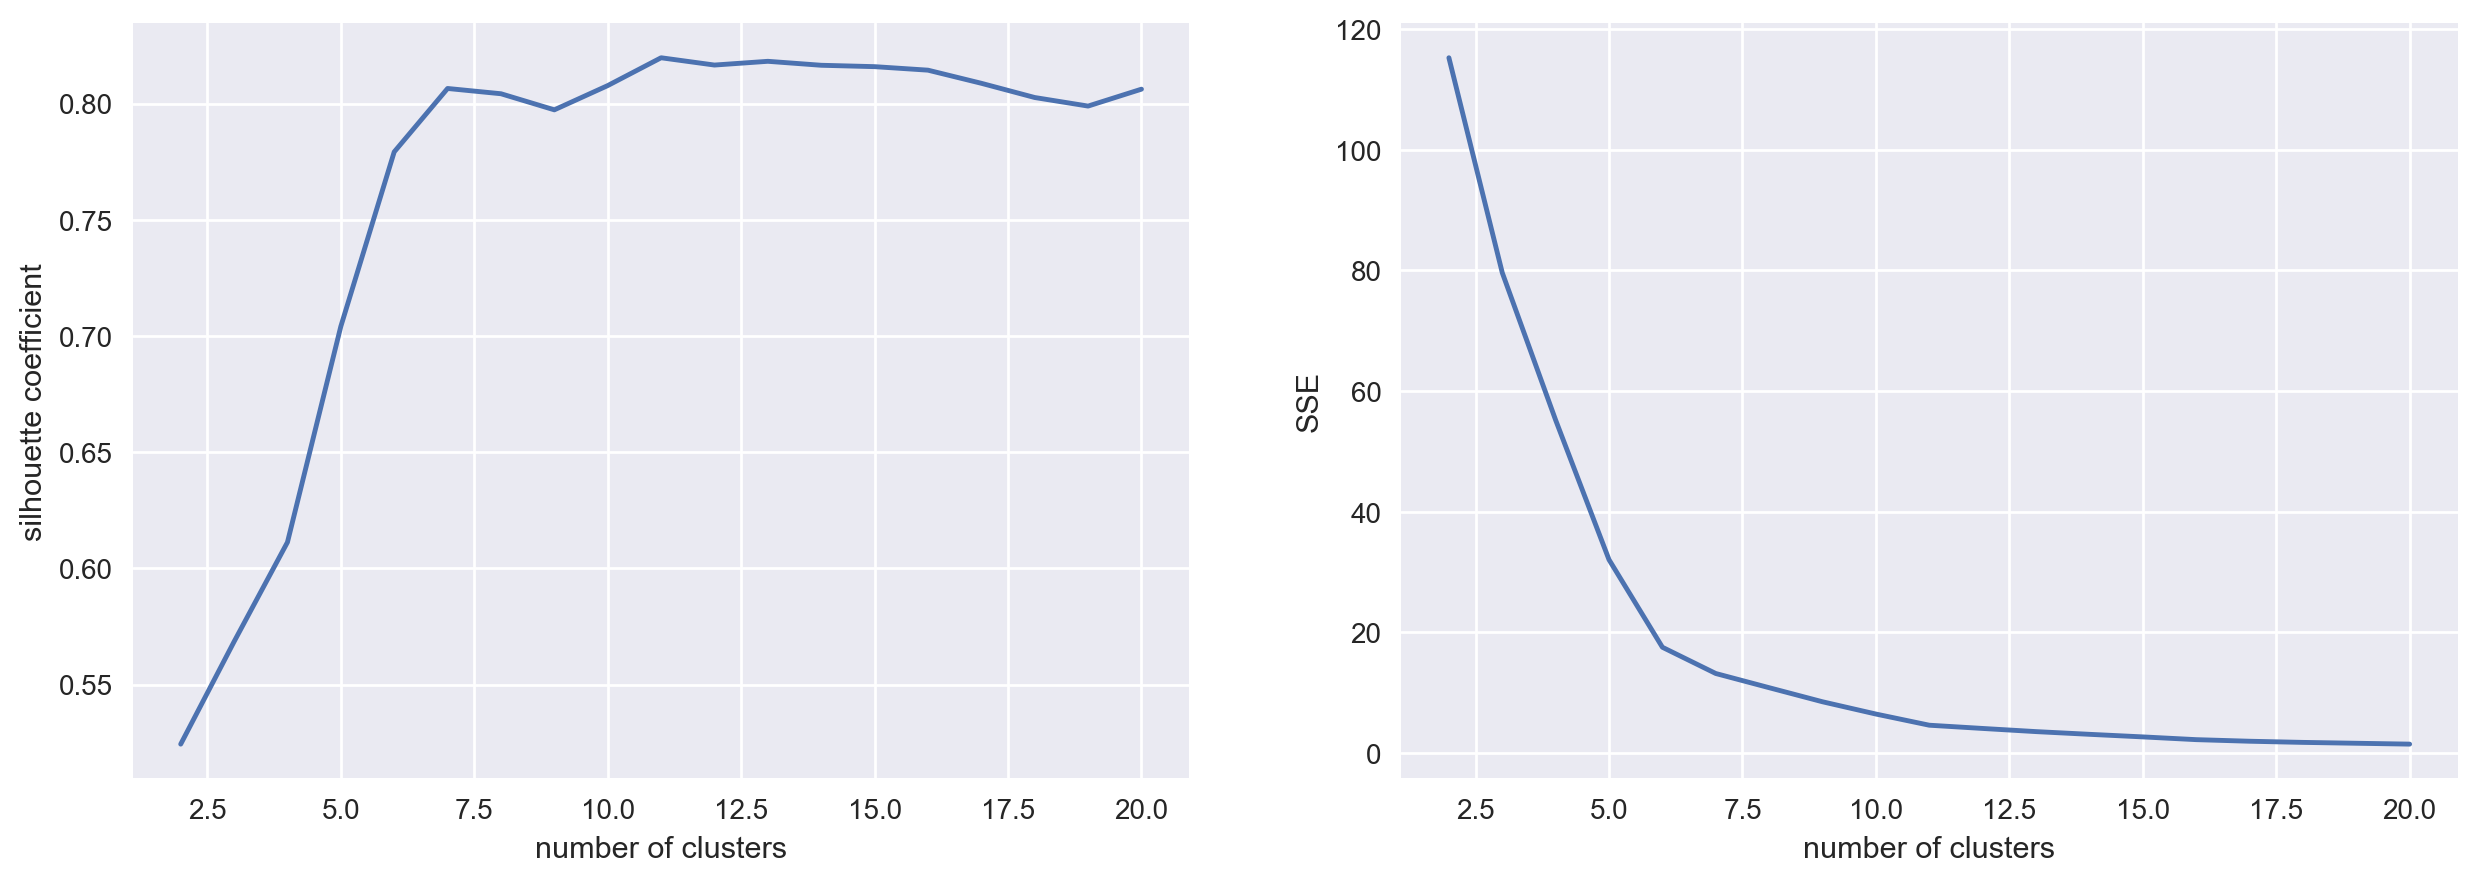

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,21)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [68]:
km = KMeans(n_clusters=20)
clusts = km.fit_predict(X_centered_projected)

In [71]:
centers = km.cluster_centers_
centers

array([[9.45032045e-07, 9.45032062e-07, 2.62917196e-01, 9.45032046e-07,
        1.59432678e-04, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        3.44113765e-03, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032063e-07, 4.20935104e-03, 7.29258707e-01],
       [5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02],
       [1.26875080e-05, 1.26875081e-05, 1.26875081e-05, 1.26875080e-05,
        1.26875081e-05, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        9.98790780e-01, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        1.26875080e-05, 1.26875080e-05, 1.26875080e-05, 1.2687

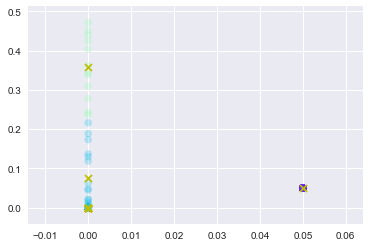

In [72]:
plt.scatter(X_centered_projected[:, 0], X_centered_projected[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='y')
#plt.xlim(-.5,1.5)
#plt.ylim(1.5,4.5)

In [121]:
os.system('say "your move Commander"')

0